## Importering av biblioteker

In [1]:
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Making plots look better
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True

%config InlineBackend.figure_format = 'retina'

### Importere dataset (TEK)

In [2]:
df_tek = pd.read_csv('vindkraft 181217 TEK met.csv',sep =';', low_memory = False, )

In [17]:
df_t1 = df_tek[['YVIK-YtreVikna1.-G1-T4015A3 -0104','YVIK-YtreVikna1..-V1-T0016A3 -0108', 'RRS.S2502.Gunit.M1 G1.AVL']]

# T1 - Første mølle Ytre Vika

#### Fordelingen av produksjonen (MW)

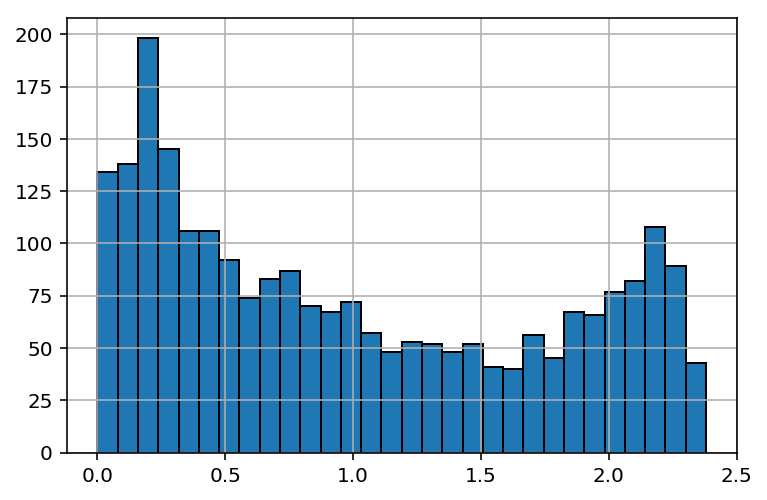

In [7]:
df_t1['YVIK-YtreVikna1.-G1-T4015A3 -0104'].hist( bins = 30)
plt.style.use('ggplot')

#### Fordeling av vindhastighet (m/s)

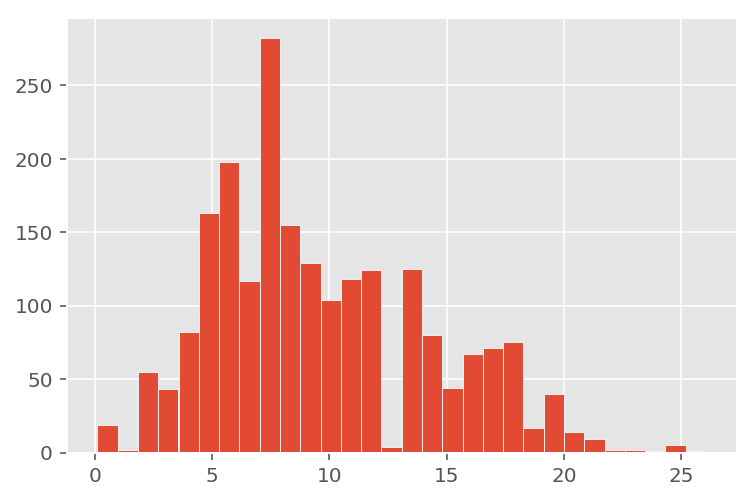

In [28]:
df_t1['YVIK-YtreVikna1..-V1-T0016A3 -0108'].hist(bins = 30)
plt.style.use('ggplot')

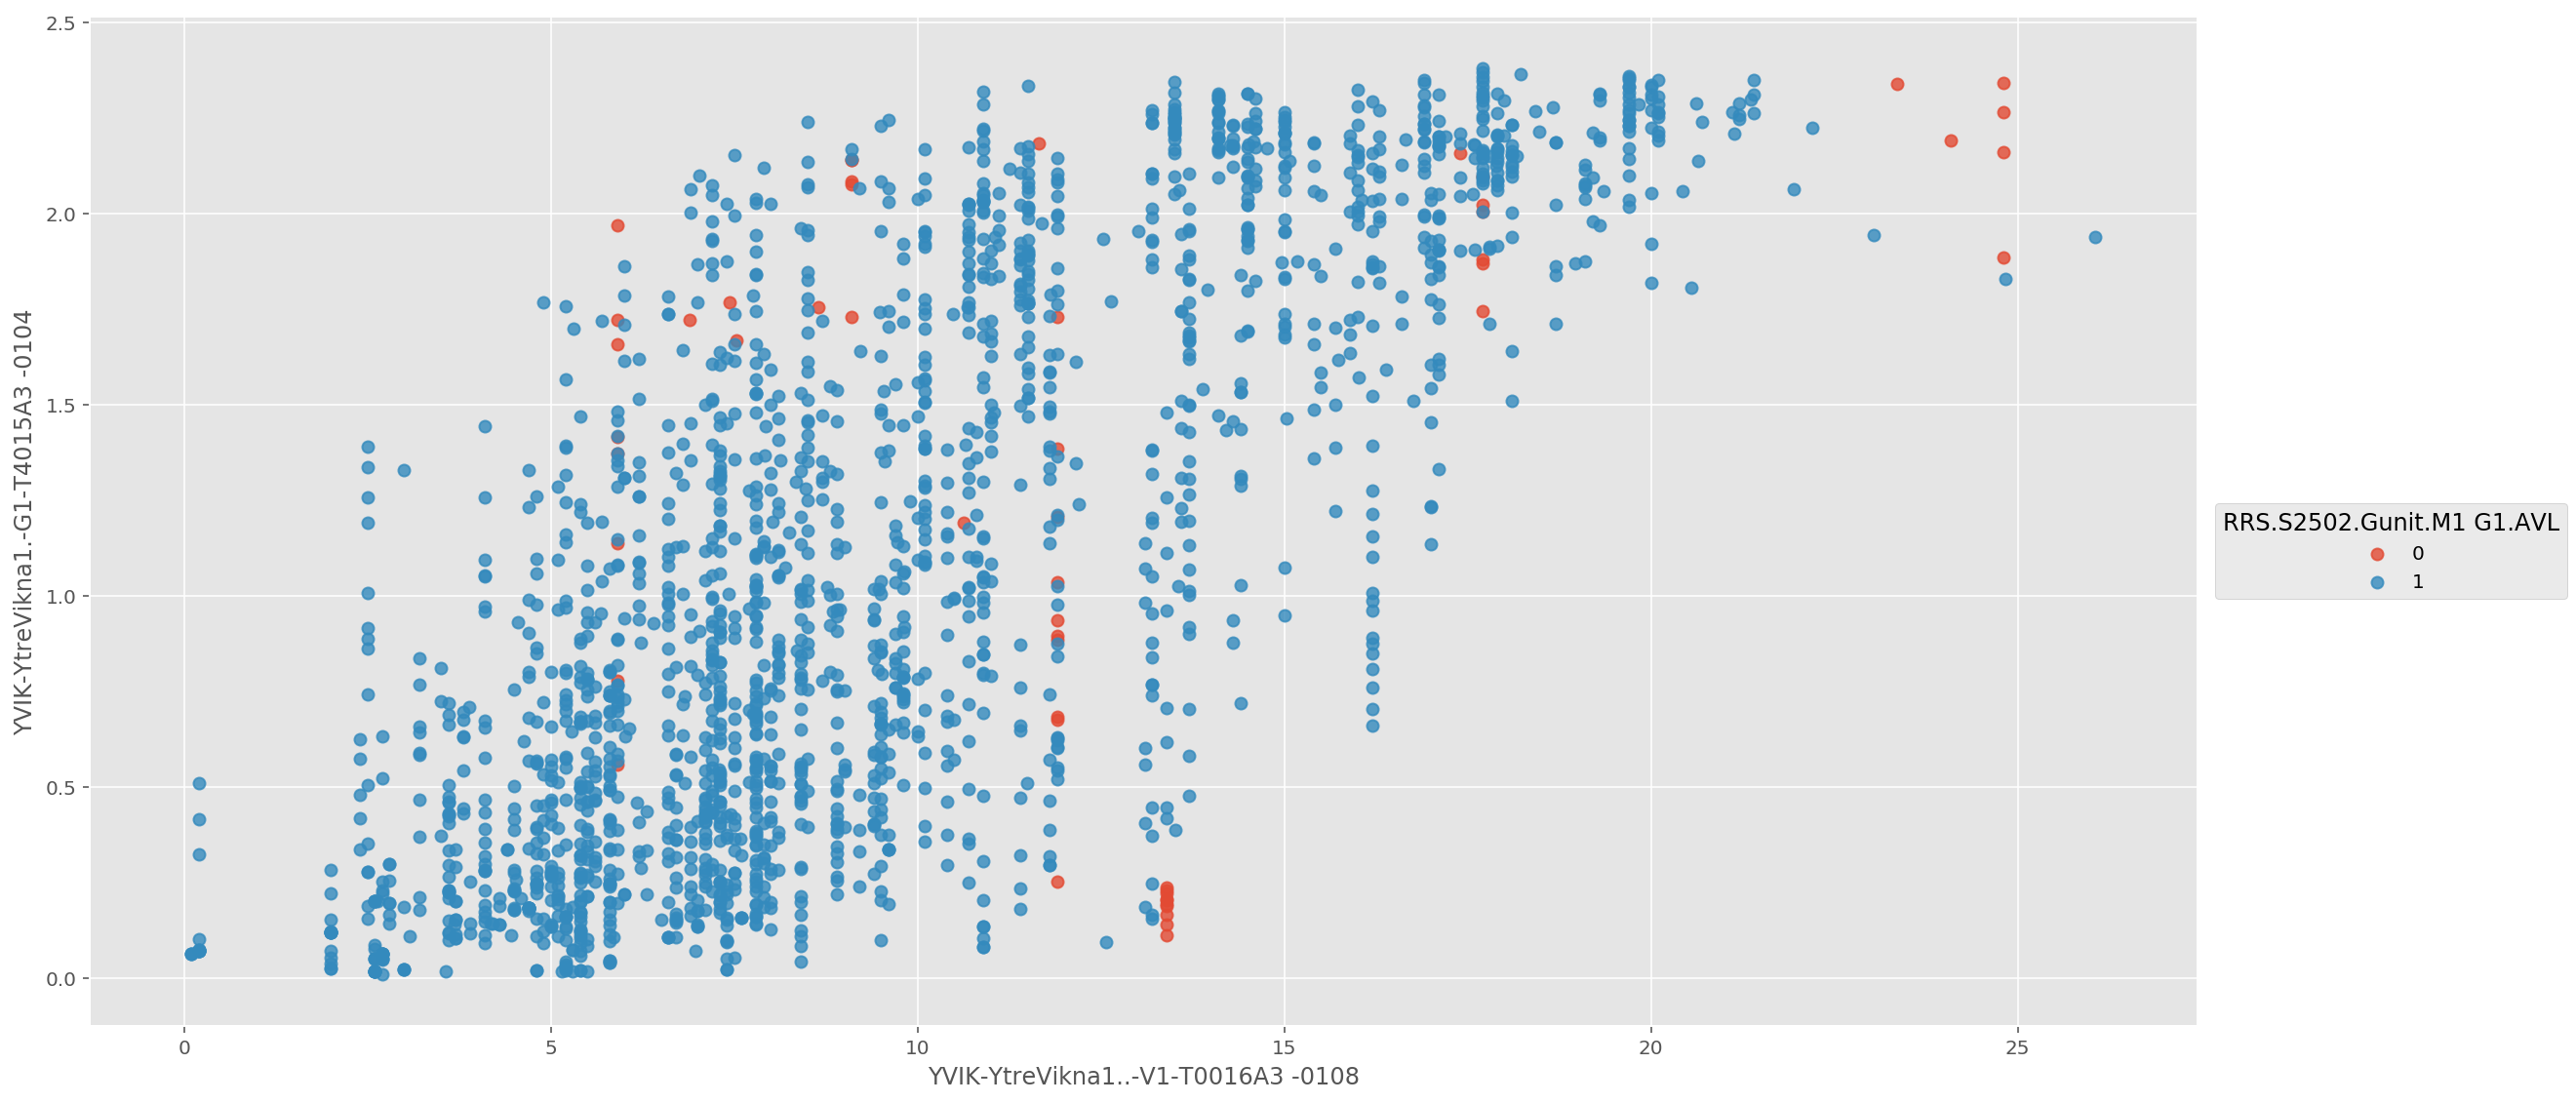

In [24]:
sns.lmplot(x='YVIK-YtreVikna1..-V1-T0016A3 -0108',y='YVIK-YtreVikna1.-G1-T4015A3 -0104',
           data=df_tek, aspect=2,size=8, hue = 'RRS.S2502.Gunit.M1 G1.AVL', fit_reg = False)

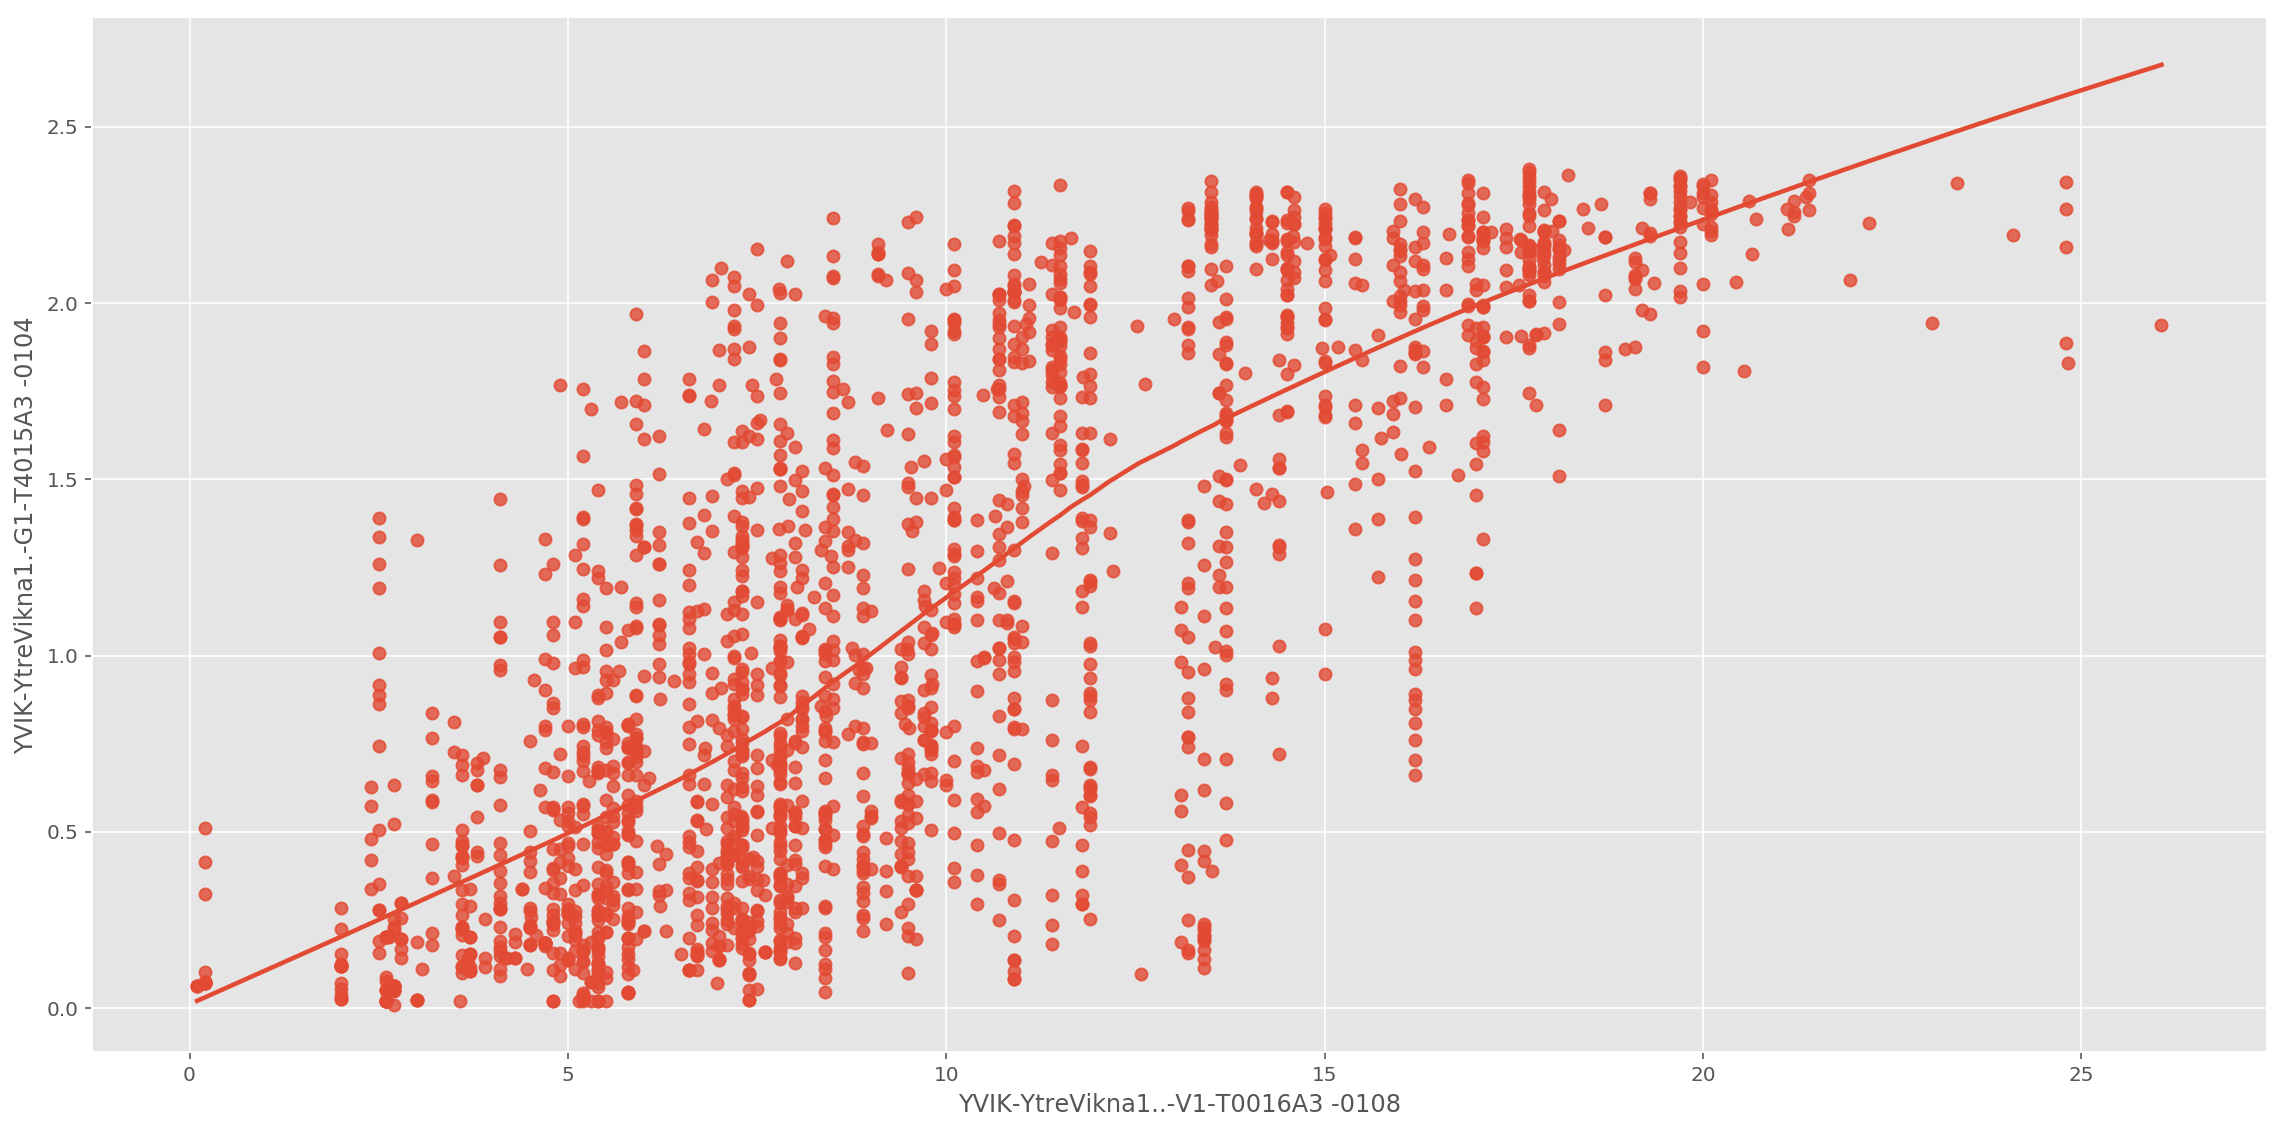

In [60]:
sns.lmplot(x='YVIK-YtreVikna1..-V1-T0016A3 -0108',y='YVIK-YtreVikna1.-G1-T4015A3 -0104',
           data=df_tek, aspect=2,size=8, lowess = True)

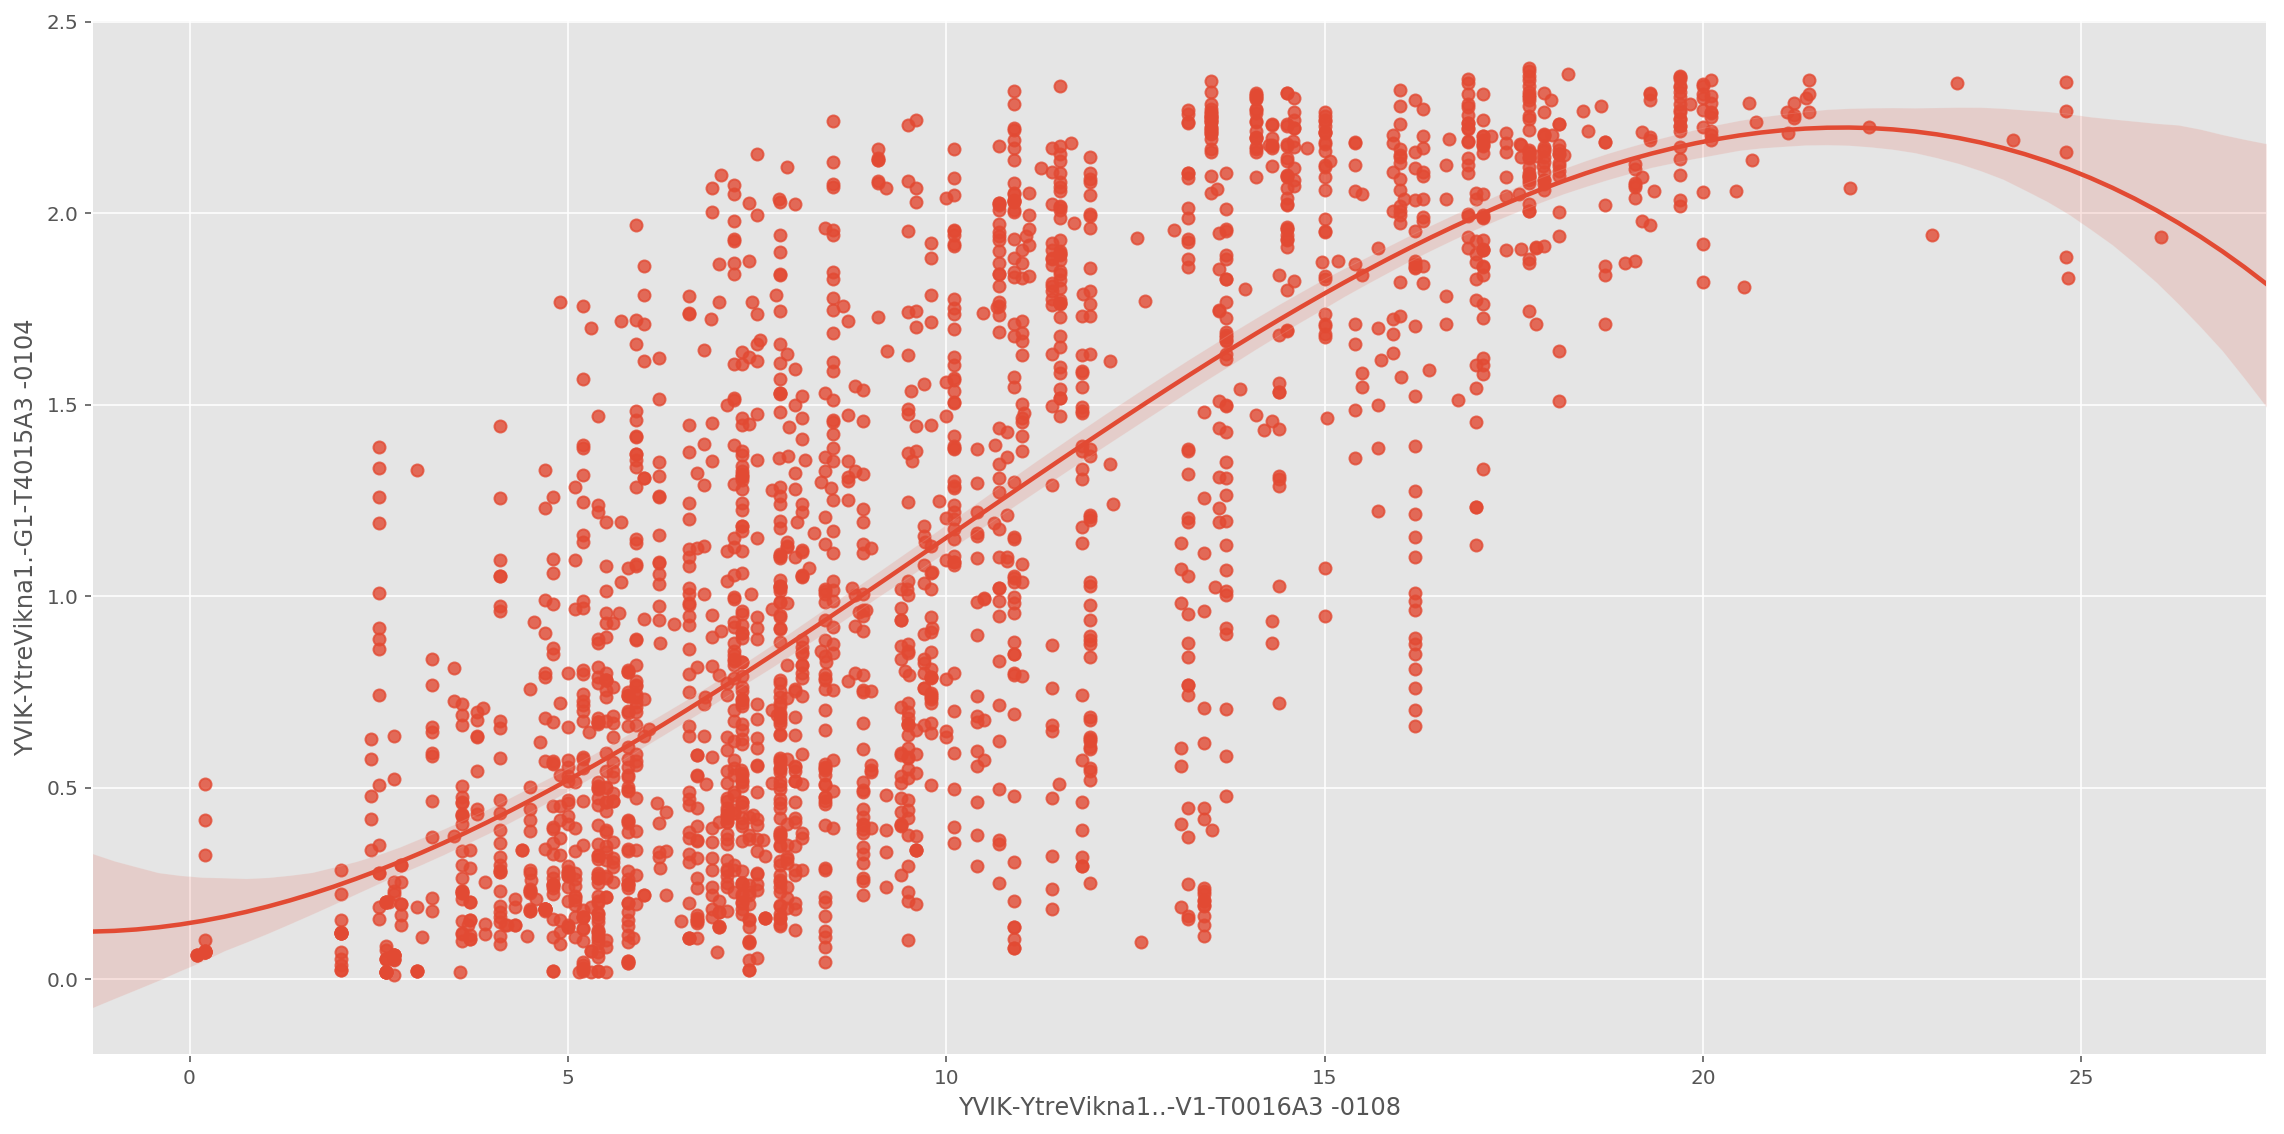

In [68]:
sns.lmplot(x='YVIK-YtreVikna1..-V1-T0016A3 -0108',y='YVIK-YtreVikna1.-G1-T4015A3 -0104',
           data=df_tek, aspect=2,size=8, order = 4)

## Sammenligning av spådd vær og faktisk vær (nærmeste aromestasjon)

In [30]:
df = pd.read_csv('vindkraft 181217 arome.csv',sep =';', low_memory = False, )

In [32]:
weather_nearest = df[['Time','/arome_winddir_6491_1087', '/arome_windvel_6491_1087']]
# Nærmeste værmast

In [33]:
weather_real = df_t1['YVIK-YtreVikna1..-V1-T0016A3 -0108']

In [34]:
data = pd.concat([weather_nearest,weather_real],axis=1)

In [46]:
#data.head()

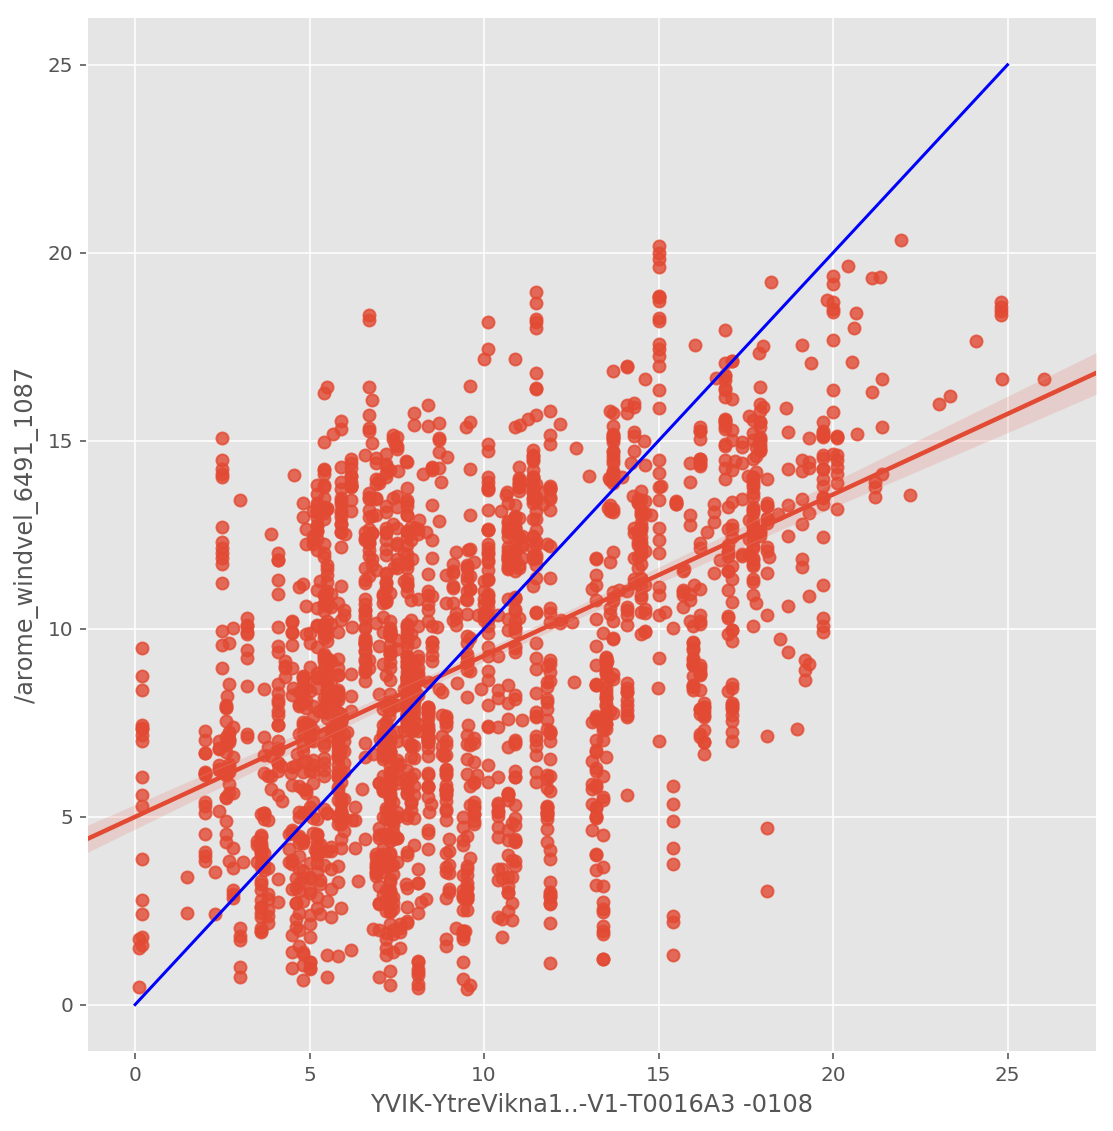

In [45]:
sns.lmplot(x='YVIK-YtreVikna1..-V1-T0016A3 -0108',y='/arome_windvel_6491_1087',
           data=data, aspect=1,size=8, fit_reg = True)
plt.plot(np.linspace(0,25,100),np.linspace(0,25,100) , 'b')
# Blå er forventet
# Rød er den faktiske observert i dataen

## Sammenligning av spådd vær og faktisk vær (Hovedstasjon vindpark)

In [75]:
weather_nearest_main = df_tek['STORM-YVik1-Vindhast-25km']
# Nærmeste værmast

In [76]:
data2 = pd.concat([weather_nearest_main,weather_real],axis=1)

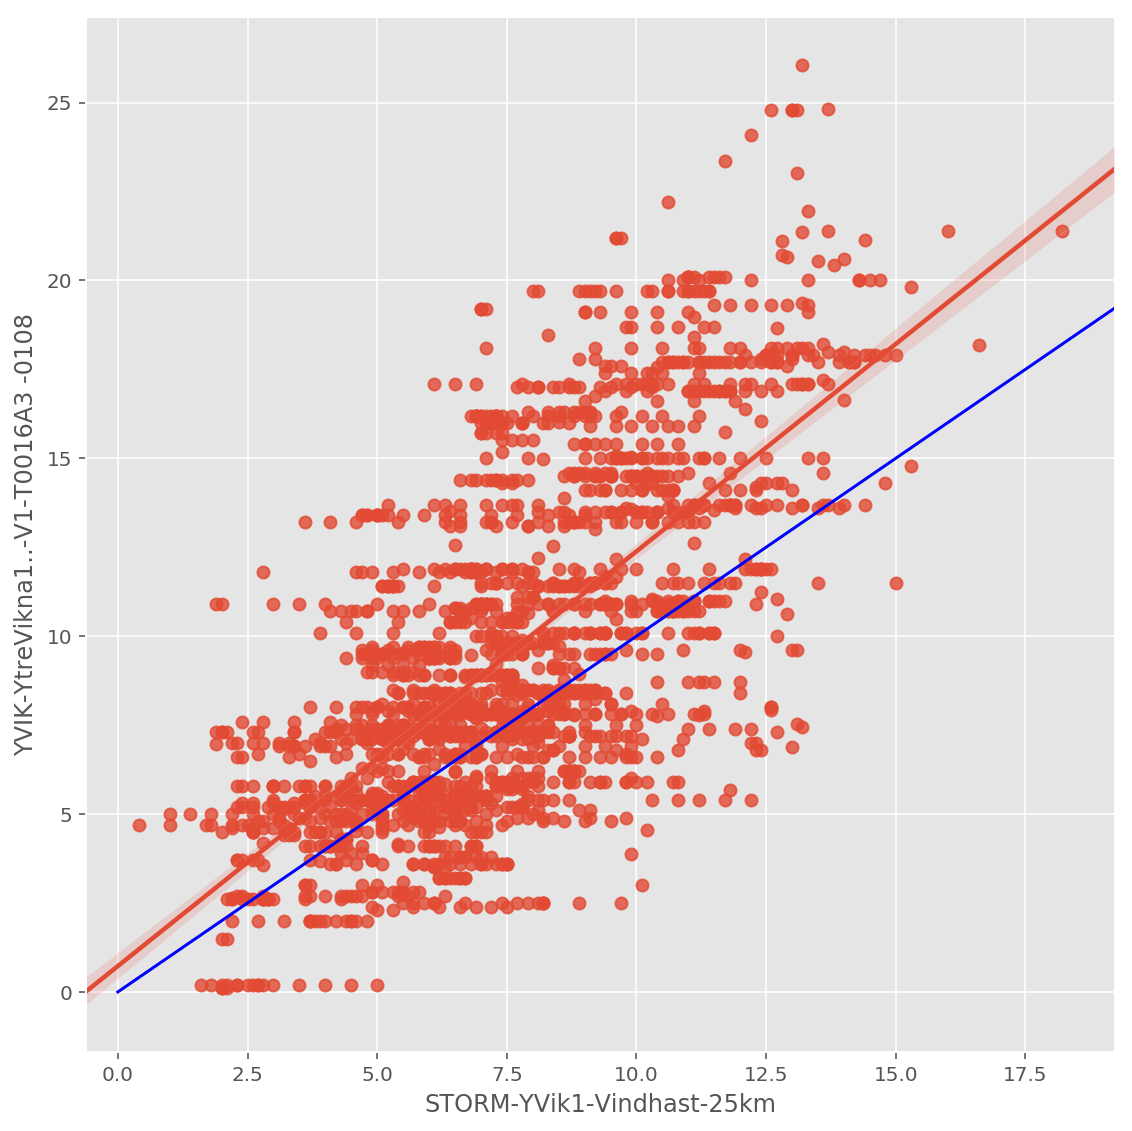

In [202]:
sns.lmplot(x='STORM-YVik1-Vindhast-25km',y='YVIK-YtreVikna1..-V1-T0016A3 -0108',
           data=data2, aspect=1,size=8, fit_reg = True)
plt.plot(np.linspace(0,25,100),np.linspace(0,25,100) , 'b')
# Blå er forventet
# Rød er den faktiske observert i dataen


In [ ]:
# Ser at vindhastigheten er betydelig større enn den spådde hastigheten.

### Registret vind på vindstasjon (Ytre Vika) vs produksjon (T1)

In [186]:
data3 = pd.concat([data2,df_tek['YVIK-YtreVikna1.-G1-T4015A3 -0104']],axis=1)

In [187]:
data3.head()

,STORM-YVik1-Vindhast-25km,YVIK-YtreVikna1..-V1-T0016A3 -0108,YVIK-YtreVikna1.-G1-T4015A3 -0104
0,3.7,3.000000,0.022000
1,3.6,3.000000,0.022000
2,3.6,3.000000,0.022000
3,3.7,NaN,0.111233
4,3.7,4.099999,0.356000


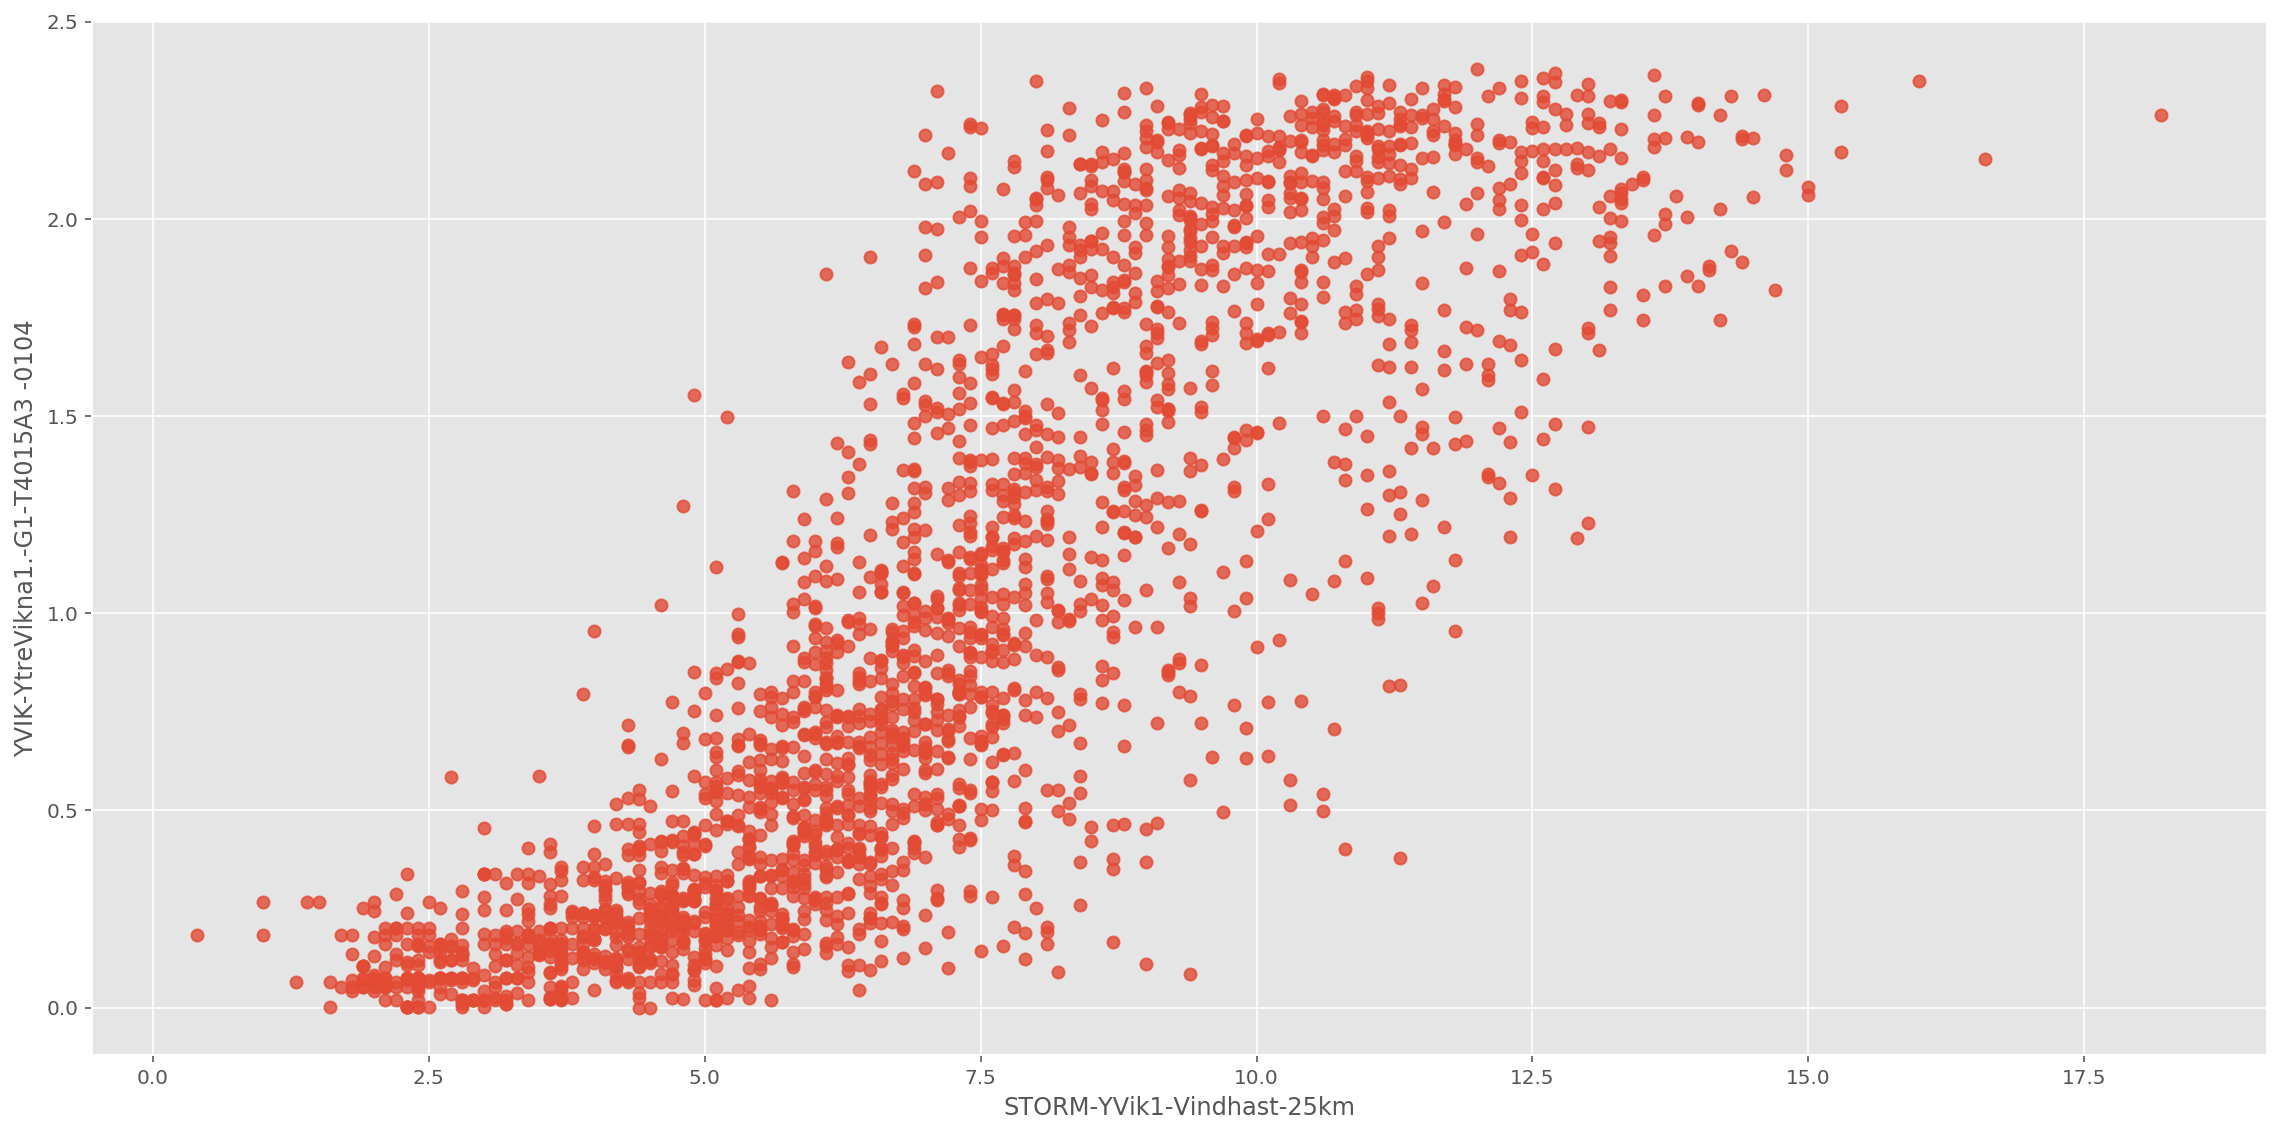

In [188]:
sns.lmplot(x='STORM-YVik1-Vindhast-25km',y='YVIK-YtreVikna1.-G1-T4015A3 -0104',
           data=data3, aspect=2,size=8, fit_reg = False )


##### Lager min egen funksjon

In [124]:
x = pd.Series(np.linspace(0,25,100))

In [126]:
y = x

In [141]:
dataframe = pd.DataFrame({'x': x, 'y': y})

In [180]:
def sigmoid(x):
    return 2.3*(1/(1+2.71828182846**(-0.8*x+6)))

In [181]:
dataframe['new'] = dataframe['y'].apply(sigmoid)

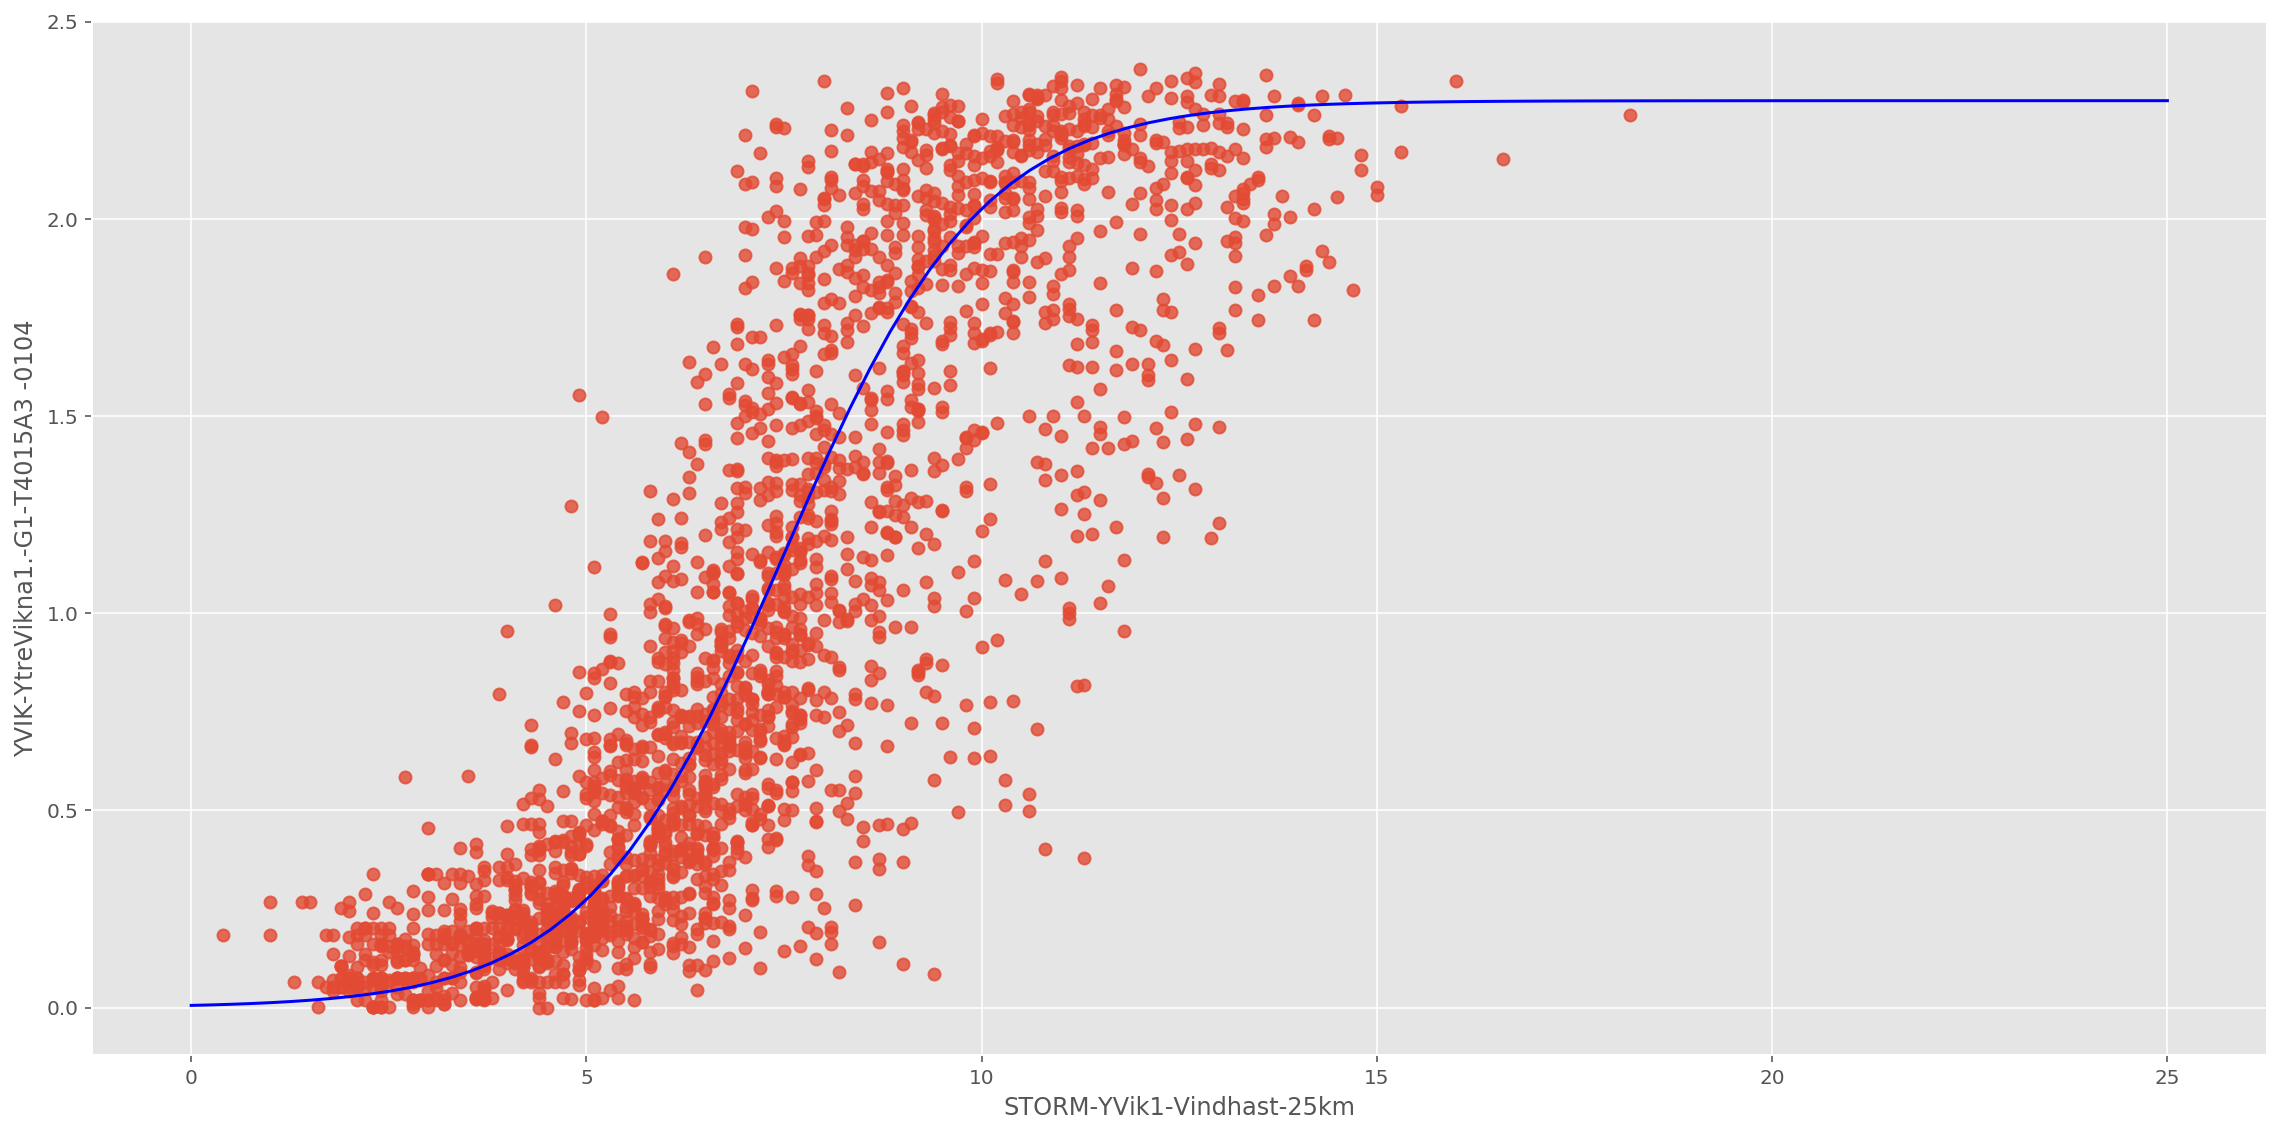

In [182]:
sns.lmplot(x='STORM-YVik1-Vindhast-25km',y='YVIK-YtreVikna1.-G1-T4015A3 -0104',
           data=data3, aspect=2,size=8, fit_reg = False )
plt.plot(dataframe['x'],dataframe['new'] , 'b')

## Er det noen sammengeng mellom effekt og vindretning

In [189]:
data4 = pd.concat([data2,df_tek['YVIK-YtreVikna1.-G1-T4015A3 -0104'],df_tek['YVIK-YtreVikna1NP-V1-T0014A3.-0113']],axis=1)

In [199]:
data4.head()

,STORM-YVik1-Vindhast-25km,YVIK-YtreVikna1..-V1-T0016A3 -0108,YVIK-YtreVikna1.-G1-T4015A3 -0104,YVIK-YtreVikna1NP-V1-T0014A3.-0113
0,3.7,3.000000,0.022000,242.953339
1,3.6,3.000000,0.022000,268.864990
2,3.6,3.000000,0.022000,272.603333
3,3.7,NaN,0.111233,297.093323
4,3.7,4.099999,0.356000,289.440002


##### UTEN:

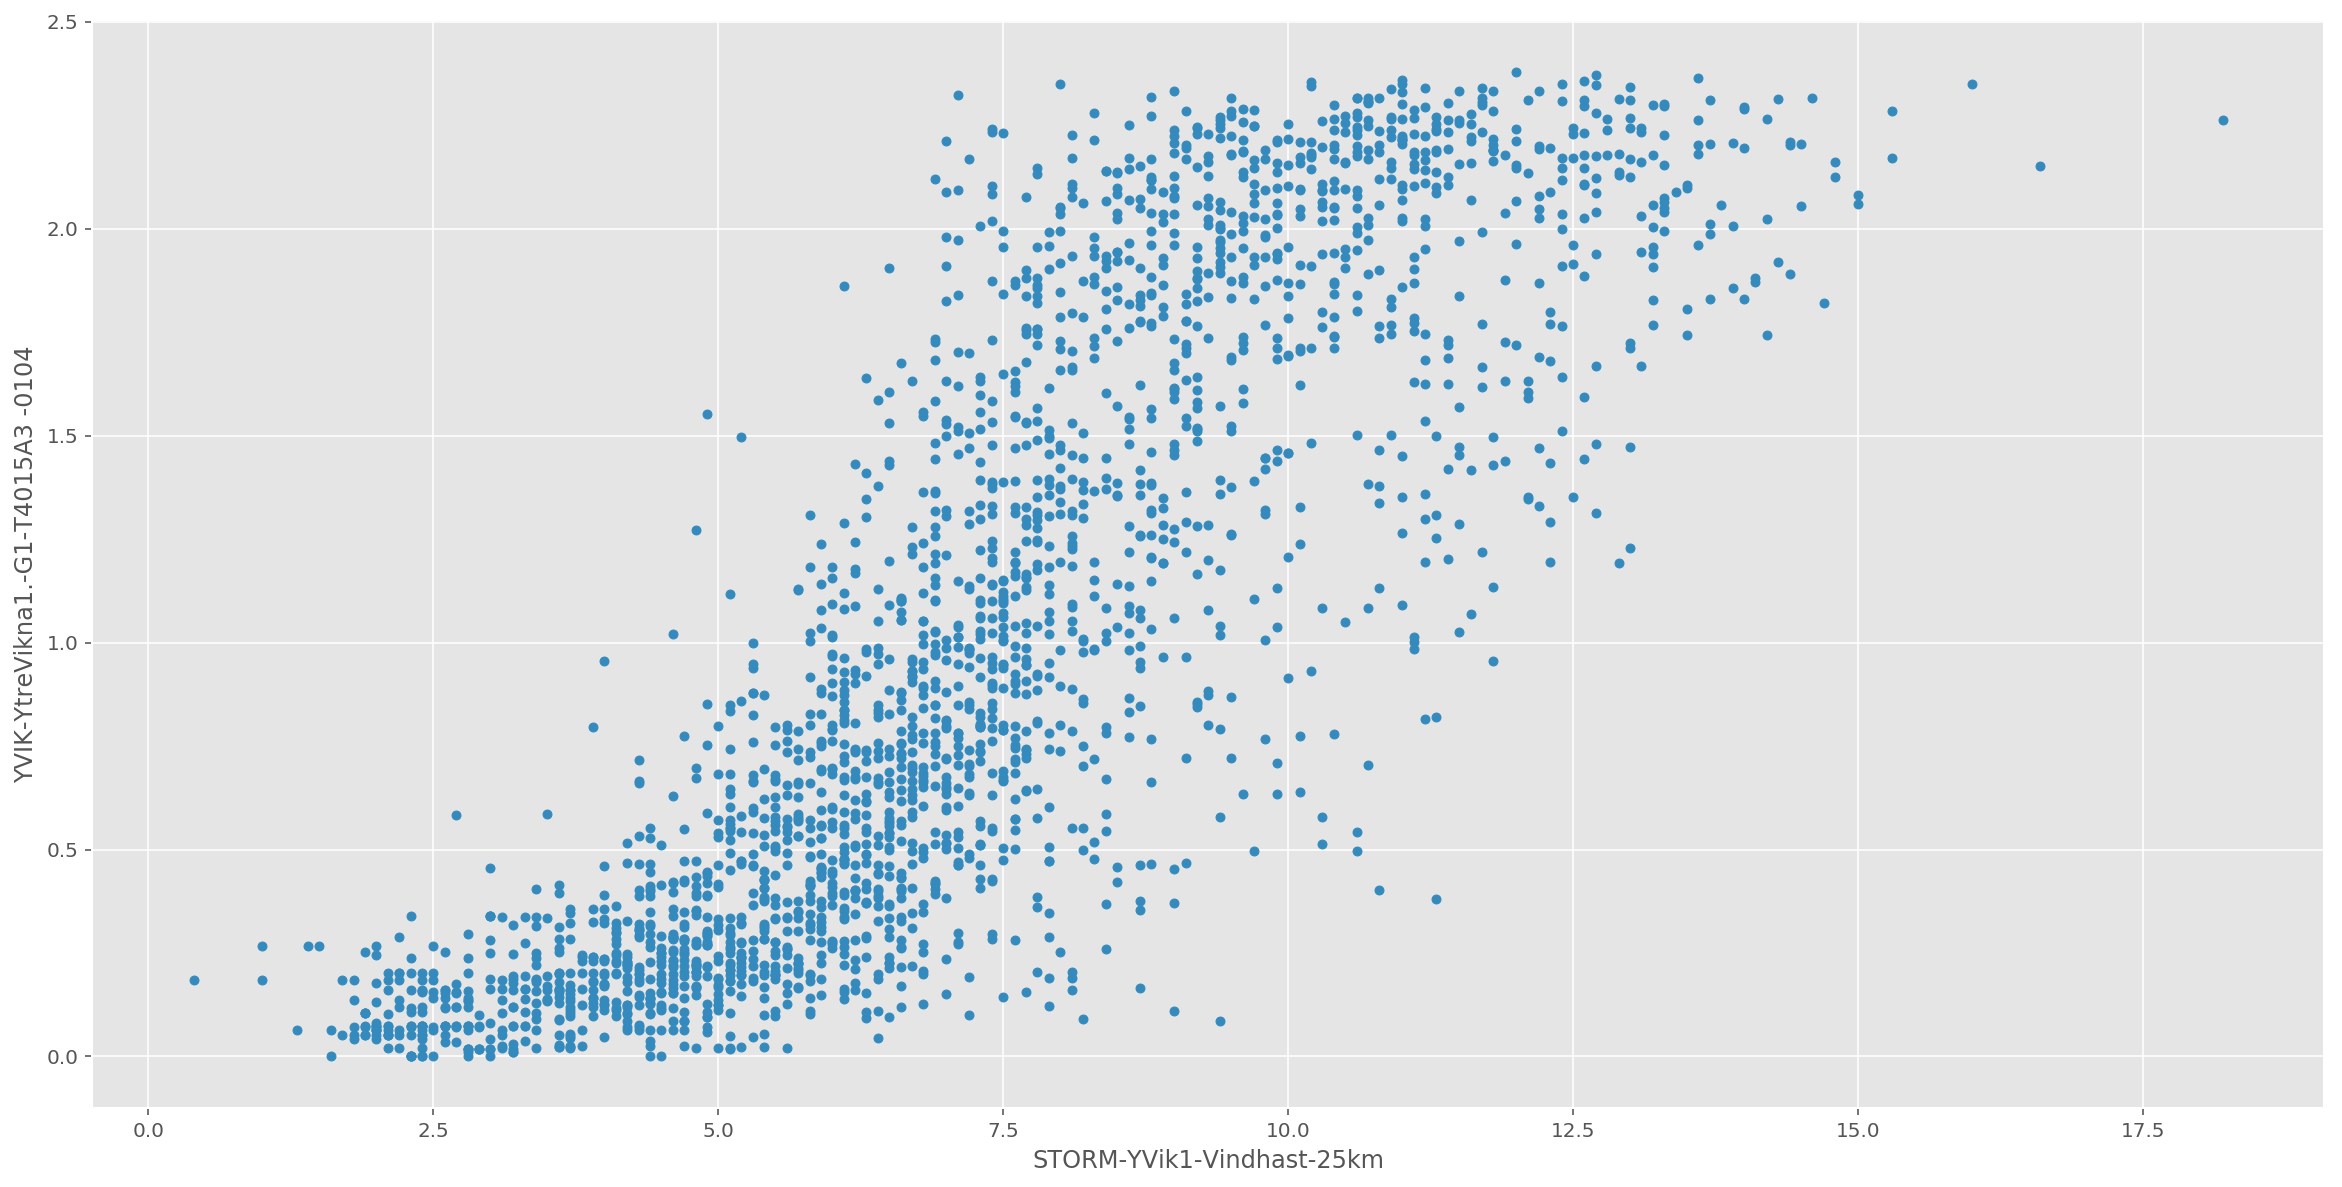

In [201]:
data4.plot.scatter(x='STORM-YVik1-Vindhast-25km',y='YVIK-YtreVikna1.-G1-T4015A3 -0104',
                    figsize = (20,10))

#### MED:

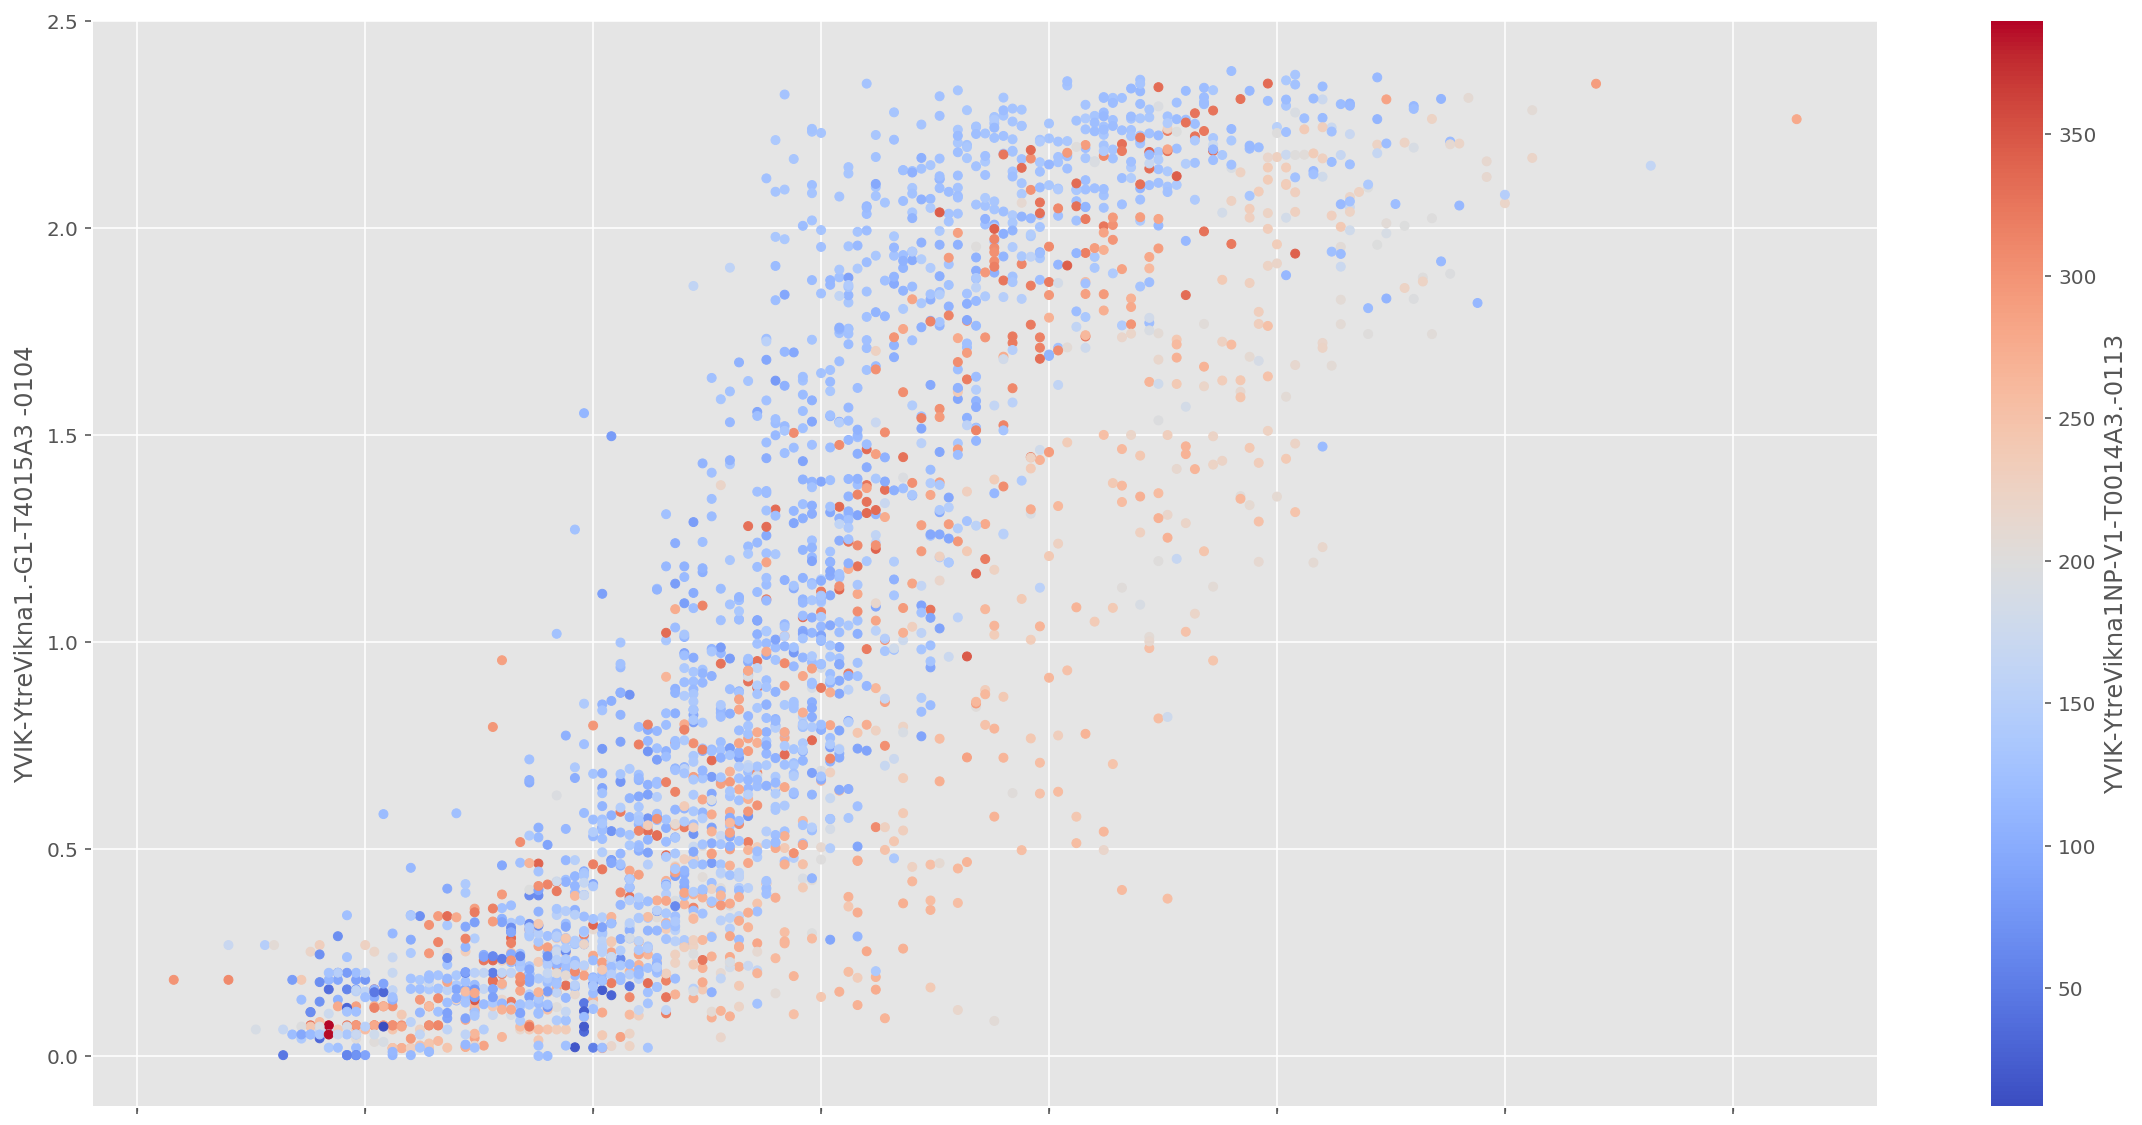

In [204]:
data4.plot.scatter(x='STORM-YVik1-Vindhast-25km',y='YVIK-YtreVikna1.-G1-T4015A3 -0104',
                   c='YVIK-YtreVikna1NP-V1-T0014A3.-0113',cmap='coolwarm', figsize = (20,10))
#plt.plot(dataframe['x'],dataframe['new'] , 'b')
